# Analisis Perbandingan Kinerja Metode Iterative dan Rekursif dalam Sistem Perhitungan Aplikasi Konversi Tarif Pengiriman Paket

# Business Understanding(Topik)

**Konversi berat paket, berat volumetrik, dan ukuran dimensi untuk perhitungan tarif pengiriman**

Misalnya, perusahaan pengiriman memiliki tarif berdasarkan berat barang, berat volumetrik, dan ukuran dimensi. Kita menghitung running time perhitungan tarif pengiriman pada metode algoritma iteratif dan rekursif

# Case Understanding (Soal)

Pembuatan algoritma iteratif dan rekursif untuk topik yang telah dipilih. Lakukan analisis kompleksitas waktu, running time, menentukan kelas kompleksitas waktu, menggambarkan grafik, dan menentukan kelas kompleksitas masing-masing algoritma.

# Load Data

In [ ]:
import pandas as pd # untuk membaca dataset
df = pd.read_csv('JNE_dummy_dataset_no_tarif.csv')
df

,ID Pengiriman,Asal,Tujuan,Berat Barang (kg),Dimensi Barang (cm),Layanan,Berat Volumetrik (kg)
0,JNE001,Yogyakarta,Makassar,0.7,19x30x33,REG,3.1
1,JNE002,Bali,Bandung,2.9,12x20x47,OKE,1.9
2,JNE003,Bali,Jakarta,1.7,17x29x28,REG,2.3
3,JNE004,Semarang,Balikpapan,8.8,35x46x35,YES,9.4
4,JNE005,Medan,Bali,5.3,46x19x34,OKE,5.0
...,...,...,...,...,...,...,...
95,JNE096,Bali,Makassar,10.0,32x38x39,OKE,7.9
96,JNE097,Bali,Medan,1.0,10x15x38,REG,0.9
97,JNE098,Yogyakarta,Bali,5.8,20x46x28,REG,4.3
98,JNE099,Jakarta,Yogyakarta,9.7,50x18x43,YES,6.5


## Daftar Harga (ketentuan)

In [ ]:
harga_barang = 10000  # harga barang per kg = 10000
harga_dimensi = 500  # harga setiap total dimensi (cm) = 500
harga_volumetrik = 5000  # harga volumetrik per kg = 5000

# Iteratif

In [ ]:
import time  # untuk menghitung running time
import pandas as pd

# sesuaikan ketentuan daftar harga
harga_barang = 10000  # harga barang per kg = 10000
harga_dimensi = 500   # harga setiap total dimensi (cm) = 500
harga_volumetrik = 5000  # harga volumetrik per kg = 5000

# fungsi untuk menghitung tarif ongkos pengiriman (iteratif)
def iteratif(df):
    results = []  # list kosong untuk menyimpan hasil akhir
    start_time = time.time()  # mulai menghitung running time

    # menghitung running time setiap baris dengan index(mengakses baris), dan entry(isi dari baris)
    for index, entry in df.iterrows():
        berat_barang = entry['Berat Barang (kg)']
        # split('x') untuk memisahkan panjang x lebar x tinggi(sehingga angka saja)
        dimensi = entry['Dimensi Barang (cm)'].split('x')
        # mengubah dimensi barang ke int dan mengurutkan sesuai panjang, lebar, tinggi
        panjang, lebar, tinggi = map(int, dimensi)
        berat_volumetrik = entry['Berat Volumetrik (kg)']

        # melakukan kalkulasi sesuai daftar harga di awal
        harga_berat_barang = berat_barang * harga_barang
        harga_berat_dimensi = (panjang + lebar + tinggi) * harga_dimensi
        harga_berat_volumetrik = berat_volumetrik * harga_volumetrik

        total_tarif = harga_berat_barang + harga_berat_dimensi + harga_berat_volumetrik
        # menambahkan hasil tarif ke list
        results.append({
            'ID Pengiriman': entry['ID Pengiriman'],
            'Total Cost (IDR)': total_tarif
        })

    end_time = time.time()  # running time berhenti
    total_running_time_iteratif = end_time - start_time  # menghitung running time akhir - awal
    return results, total_running_time_iteratif  # mengeluarkan hasil dan running time

# fungsi menghitung waktu eksekusi untuk ukuran input yang berbeda
def running_times_iteratif(df, sizes):
    running_times = [] # menampung hasil running time setiap jumlah inputan
    for size in sizes:
        # ambil subset data sesuai ukuran
        subset_df = df.head(size)
        _, running_time = iteratif(subset_df)
        running_times.append(running_time)
    return running_times

if __name__ == "__main__":
    sizes = [25, 50, 75, 100]  # ukuran data yang masuk ketika 25 data, 50, 75, dan 100 data.
    # Menghitung waktu eksekusi untuk setiap ukuran
    running_times_iteratif = running_times_iteratif(df, sizes)
    running_times_iteratif_4 = [f"{time:.4f}" for time in running_times_iteratif]
    # menampilkan hasil dengan 4 angka di belakang koma
    print(f"Waktu iteratif {sizes}: {running_times_iteratif_4}")


Waktu iteratif [25, 50, 75, 100]: ['0.0101', '0.0115', '0.0422', '0.0285']


Fungsi iteratif menggunakan loop for untuk mengiterasi setiap baris data secara langsung dengan df.iterrows().

Tidak ada pemanggilan fungsi berulang. Seluruh data diproses dalam satu iterasi.
Penggunaan memori lebih efisien dibandingkan rekursif, karena tidak ada penggunaan stack yang berlebihan.

kompleksitas waktu iteratif : O(n)

# Rekursif

In [ ]:
# fungsi untuk menghitung biaya pengiriman (rekursif)
def rekursif(df, index=0, results=None):
    if results is None: # jika list kosong, maka akan ditambahkan ke results
        results = [] # dilakukan perulangan dan disimpan hasilnya disini (ditumpuk)

    if index == len(df): # jika jumlah baris = jumlah data maka akan dikeluarkan results
        return results

    # ketentuan daftar harga
    entry = df.iloc[index]
    harga_barang = 10000
    harga_dimensi = 500
    harga_volumetrik = 5000

    # sama seperti iteratif sebelumnya
    berat_barang = entry['Berat Barang (kg)']
    dimensi = entry['Dimensi Barang (cm)'].split('x')
    panjang, lebar, tinggi = map(int, dimensi)
    berat_volumetrik = entry['Berat Volumetrik (kg)']

    harga_berat_barang = berat_barang * harga_barang
    harga_berat_dimensi = (panjang + lebar + tinggi) * harga_dimensi
    harga_berat_volumetrik = berat_volumetrik * harga_volumetrik

    total_harga_rekursif = harga_berat_barang + harga_berat_dimensi + harga_berat_volumetrik
    results.append({
        'ID Pengiriman': entry['ID Pengiriman'],
        'Total Cost (IDR)': total_harga_rekursif
    })

    return rekursif(df, index + 1, results)

# menghitung running time berdasarkan jumlah input sizes
def running_time_rekursif(df, sizes):
    running_times = []
    for size in sizes:
        # ambil subset data
        subset_df = df.head(size)
        start_time = time.time()
        rekursif(subset_df)
        end_time = time.time()
        running_times.append(end_time - start_time) # menghitung running time
    return running_times

if __name__ == "__main__":
    sizes = [25, 50, 75, 100] # jumlah data ketika dimasukkan untuk penghitungan running time
     # Menghitung waktu eksekusi untuk setiap ukuran
    running_time_rekursif = running_time_rekursif(df, sizes)
    running_time_rekursif_4 = [f"{time:.4f}" for time in running_time_rekursif]
    # menampilkan hasil dengan 4 angka di belakang koma
    print(f"Waktu rekursif {sizes}: {running_time_rekursif_4}")

Waktu rekursif [25, 50, 75, 100]: ['0.0180', '0.0154', '0.0413', '0.0374']


Fungsi rekursif memanggil dirinya sendiri secara berulang dengan memperbarui nilai index untuk memproses setiap baris data.

Basis rekursi terjadi ketika index mencapai panjang df, yang menghentikan pemanggilan lebih lanjut.
Penggunaan memori lebih besar karena setiap panggilan rekursif menyimpan status eksekusinya dalam stack.

kompleksitas waktu rekursif : O(n)

# Visualisasi

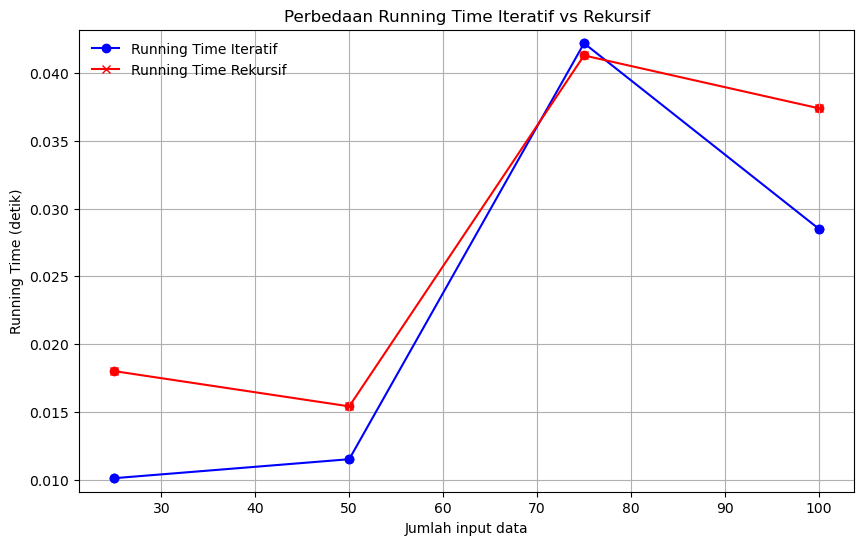

In [ ]:
import matplotlib.pyplot as plt

def visualisasi(running_times_iteratif_4, running_time_rekursif_4, sizes):
    # Mengonversi string ke float
    running_times_iteratif_4 = list(map(float, running_times_iteratif_4))
    running_time_rekursif_4 = list(map(float, running_time_rekursif_4))

    plt.figure(figsize=(10, 6))  # ukuran figure

    # line chart iteratif
    plt.plot(sizes, running_times_iteratif_4, 'bo-', label='Running Time Iteratif')
    plt.scatter(sizes, running_times_iteratif_4, color='b')  # menambahkan titik untuk iteratif

    # line chart rekursif
    plt.plot(sizes, running_time_rekursif_4, 'rx-', label='Running Time Rekursif')
    plt.scatter(sizes, running_time_rekursif_4, color='r')  # menambahkan titik untuk rekursif

    # label sumbu X dan Y
    plt.xlabel('Jumlah input data')
    plt.ylabel('Running Time (detik)')

    # judul dan grid
    plt.title('Perbedaan Running Time Iteratif vs Rekursif')
    plt.grid(True)

    # menambahkan legenda iteratif dan rekursif di pojok kiri atas tanpa bertumpukan(bbox)
    plt.legend(loc='upper left', bbox_to_anchor=(0, 1), frameon=False)

    # menentukan rentang sumbu Y agar mencakup kedua metode iteratif dan rekursif
    plt.ylim(min(min(running_times_iteratif_4), min(running_time_rekursif_4)) - 0.001,
             max(max(running_times_iteratif_4), max(running_time_rekursif_4)) + 0.001)

    # menampilkan plot
    plt.show()

# menjalankan fungsi
if __name__ == "__main__":
    sizes = [25, 50, 75, 100]  # ukuran data yang masuk
    running_times_iteratif_4 = ['0.0101', '0.0115', '0.0422', '0.0285']  # waktu eksekusi iteratif
    running_time_rekursif_4 =  ['0.0180', '0.0154', '0.0413', '0.0374']  # waktu eksekusi rekursif

    visualisasi(running_times_iteratif_4, running_time_rekursif_4, sizes)

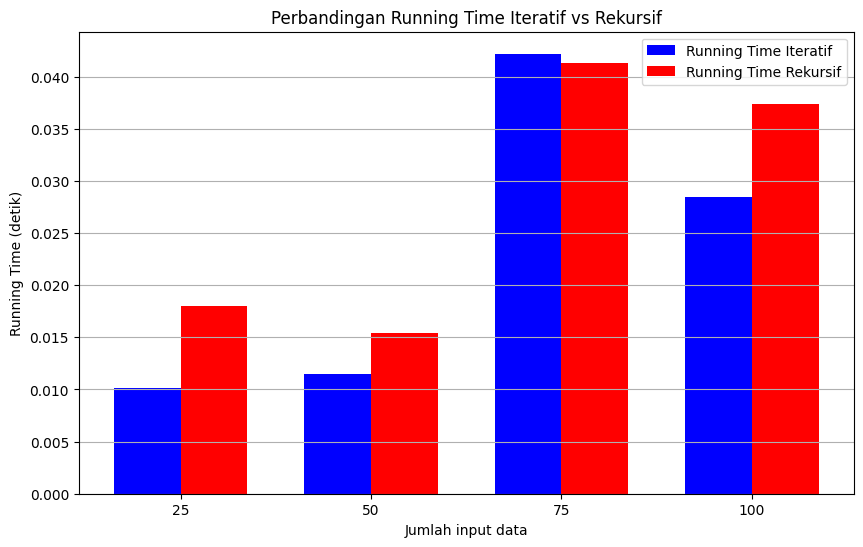

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def visualisasi_bar_chart(running_times_iteratif_4, running_time_rekursif_4, sizes):
    # Mengonversi string ke float
    running_times_iteratif_4 = list(map(float, running_times_iteratif_4))
    running_time_rekursif_4 = list(map(float, running_time_rekursif_4))

    # Menentukan posisi bar
    x = np.arange(len(sizes))

    # Lebar bar
    width = 0.35

    # Membuat plot
    plt.figure(figsize=(10, 6))

    # Bar chart untuk metode iteratif dan rekursif
    plt.bar(x - width / 2, running_times_iteratif_4, width, label='Running Time Iteratif', color='b')
    plt.bar(x + width / 2, running_time_rekursif_4, width, label='Running Time Rekursif', color='r')

    # Menambahkan label dan judul
    plt.xlabel('Jumlah input data')
    plt.ylabel('Running Time (detik)')
    plt.title('Perbandingan Running Time Iteratif vs Rekursif')

    # Menampilkan ukuran input pada sumbu X
    plt.xticks(x, sizes)

    # Menambahkan grid dan legenda
    plt.grid(True, axis='y')
    plt.legend()

    # Menampilkan plot
    plt.show()

# Menjalankan fungsi
if __name__ == "__main__":
    sizes = [25, 50, 75, 100]
    running_times_iteratif_4 = ['0.0101', '0.0115', '0.0422', '0.0285']
    running_time_rekursif_4 = ['0.0180', '0.0154', '0.0413', '0.0374']

    visualisasi_bar_chart(running_times_iteratif_4, running_time_rekursif_4, sizes)

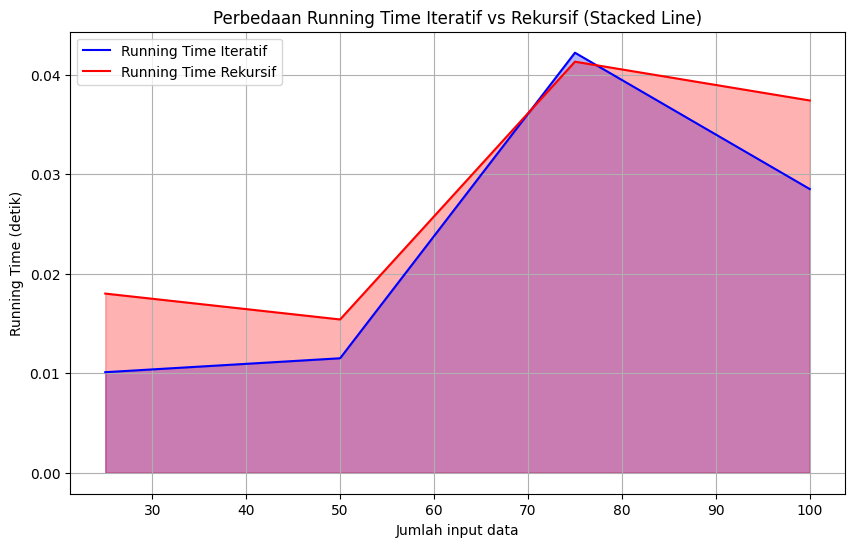

In [2]:
import matplotlib.pyplot as plt

def visualisasi_stacked_line_plot(running_times_iteratif_4, running_time_rekursif_4, sizes):
    # Mengonversi string ke float
    running_times_iteratif_4 = list(map(float, running_times_iteratif_4))
    running_time_rekursif_4 = list(map(float, running_time_rekursif_4))

    plt.figure(figsize=(10, 6))

    # Stacked line chart
    plt.plot(sizes, running_times_iteratif_4, 'b-', label='Running Time Iteratif')
    plt.plot(sizes, running_time_rekursif_4, 'r-', label='Running Time Rekursif')

    # Mewarnai area di bawah kedua grafik
    plt.fill_between(sizes, 0, running_times_iteratif_4, color='blue', alpha=0.3)
    plt.fill_between(sizes, 0, running_time_rekursif_4, color='red', alpha=0.3)

    # Label sumbu X dan Y
    plt.xlabel('Jumlah input data')
    plt.ylabel('Running Time (detik)')

    # Judul dan grid
    plt.title('Perbedaan Running Time Iteratif vs Rekursif (Stacked Line)')
    plt.grid(True)

    # Menambahkan legenda
    plt.legend(loc='upper left')

    # Menampilkan plot
    plt.show()

# Menjalankan fungsi
if __name__ == "__main__":
    sizes = [25, 50, 75, 100]
    running_times_iteratif_4 = ['0.0101', '0.0115', '0.0422', '0.0285']
    running_time_rekursif_4 = ['0.0180', '0.0154', '0.0413', '0.0374']

    visualisasi_stacked_line_plot(running_times_iteratif_4, running_time_rekursif_4, sizes)

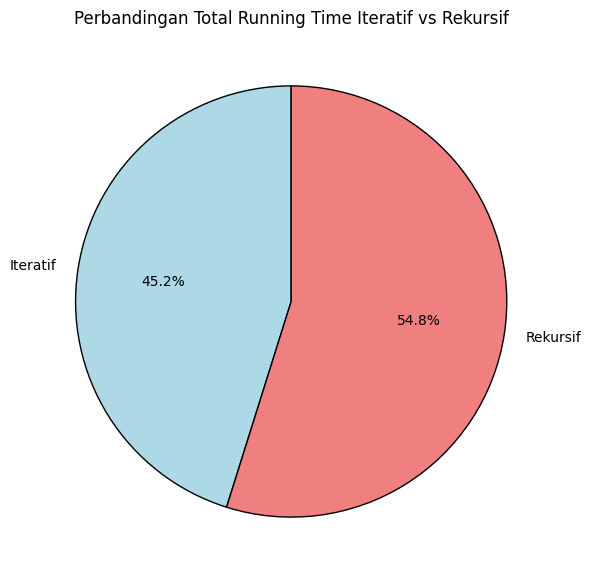

In [3]:
import matplotlib.pyplot as plt

def visualisasi_pie_chart(running_times_iteratif_4, running_time_rekursif_4):
    # Mengonversi string ke float dan menghitung total waktu
    running_times_iteratif_4 = list(map(float, running_times_iteratif_4))
    running_time_rekursif_4 = list(map(float, running_time_rekursif_4))

    # Menjumlahkan total running time untuk setiap metode
    total_iteratif = sum(running_times_iteratif_4)
    total_rekursif = sum(running_time_rekursif_4)

    # Data untuk Pie Chart
    labels = ['Iteratif', 'Rekursif']
    sizes = [total_iteratif, total_rekursif]
    colors = ['lightblue', 'lightcoral']

    # Membuat Pie Chart
    plt.figure(figsize=(7, 7))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

    # Menambahkan judul
    plt.title('Perbandingan Total Running Time Iteratif vs Rekursif')

    # Menampilkan plot
    plt.show()

# Menjalankan fungsi
if __name__ == "__main__":
    running_times_iteratif_4 = ['0.0101', '0.0115', '0.0422', '0.0285']
    running_time_rekursif_4 = ['0.0180', '0.0154', '0.0413', '0.0374']

    visualisasi_pie_chart(running_times_iteratif_4, running_time_rekursif_4)

rekursif memerlukan running time yang lebih lama daripada iteratif

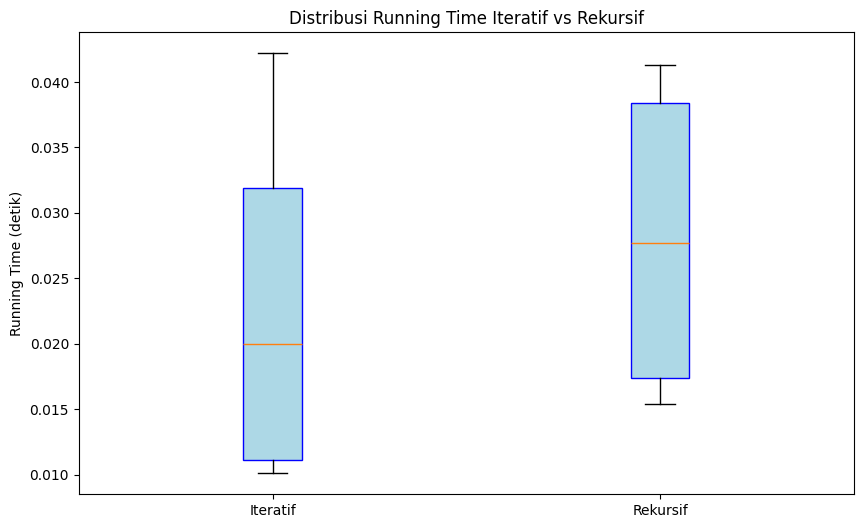

In [4]:
import matplotlib.pyplot as plt

def visualisasi_box_plot(running_times_iteratif_4, running_time_rekursif_4):
    # Mengonversi string ke float
    running_times_iteratif_4 = list(map(float, running_times_iteratif_4))
    running_time_rekursif_4 = list(map(float, running_time_rekursif_4))

    # Membuat box plot untuk kedua metode
    plt.figure(figsize=(10, 6))
    plt.boxplot([running_times_iteratif_4, running_time_rekursif_4], labels=['Iteratif', 'Rekursif'], patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                flierprops=dict(markerfacecolor='red', marker='o', markersize=8))

    # Menambahkan judul dan label
    plt.title('Distribusi Running Time Iteratif vs Rekursif')
    plt.ylabel('Running Time (detik)')

    # Menampilkan plot
    plt.show()

# Menjalankan fungsi
if __name__ == "__main__":
    running_times_iteratif_4 = ['0.0101', '0.0115', '0.0422', '0.0285']
    running_time_rekursif_4 = ['0.0180', '0.0154', '0.0413', '0.0374']

    visualisasi_box_plot(running_times_iteratif_4, running_time_rekursif_4)

# Kesimpulan

1. **Kompleksitas Waktu Iteratif (O(n))**

    Kita melakukan satu iterasi terhadap seluruh data (DataFrame), memproses setiap baris secara berurutan. Operasi yang dilakukan per baris adalah operasi konstan, seperti pemisahan string, konversi tipe data, dan beberapa operasi aritmatika.
Kompleksitas waktu adalah O(n), karena kita mengiterasi seluruh n baris data.


2. **Kompleksitas Waktu Rekursif (O(n))**

    Kita menggunakan rekursi untuk mengakses setiap baris data secara bertahap. Fungsi rekursif dipanggil dengan indeks yang lebih tinggi pada setiap panggilan rekursif, hingga mencapai baris terakhir. Seperti pada iteratif, kita melakukan operasi konstan pada setiap baris, dan memanggil fungsi rekursif sebanyak n kali.Kompleksitas waktu adalah O(n), karena kita melakukan n panggilan rekursif yang masing-masing berisi operasi konstan.

3. **Perbedaan dalam Penggunaan Memori**
    Pada algoritma iteratif, kita hanya menggunakan memori yang dibutuhkan untuk menyimpan hasil sementara dalam list results. Setiap iterasi memproses satu baris data tanpa memerlukan pemanggilan fungsi berulang kali.
    Kompleksitas ruang adalah O(n), karena kita menyimpan hasil untuk n baris.

    Pada algoritma rekursif, setiap panggilan rekursif menciptakan frame baru di stack, yang menyimpan informasi terkait eksekusi fungsi saat ini. Ini menyebabkan penggunaan memori yang lebih tinggi, terutama jika data yang diproses besar.
    Kompleksitas ruang untuk rekursi adalah O(n) karena setiap pemanggilan rekursif akan menambah satu frame ke stack, dan kita memiliki n pemanggilan rekursif.

4. **Penggunaan Memori dan Efisiensi**
    Iteratif lebih efisien dalam penggunaan memori, karena tidak ada tumpukan fungsi yang harus disimpan di memori. Algoritma ini hanya membutuhkan ruang untuk menyimpan hasil sementara dan variabel loop.
    Rekursif cenderung lebih boros dalam hal memori, karena setiap pemanggilan fungsi harus disimpan dalam stack. Jika n terlalu besar, ini dapat menyebabkan stack overflow jika kedalaman rekursi terlalu dalam (tergantung pada batas rekursi Python).


**Kesimpulan**:
Kompleksitas waktu kedua algoritma adalah O(n).
Kompleksitas ruang untuk iteratif adalah O(n), sedangkan untuk rekursif, penggunaan ruang bisa lebih tinggi (juga O(n)), namun lebih rentan terhadap masalah penggunaan memori karena tumpukan rekursi.

